In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from numpy.linalg import inv

In [28]:
plt.style.use(['ggplot'])
data = pd.read_csv('data.txt')
data.columns = ["id", "long", "lati", "alti"]
data = data.drop('id',axis = 1);

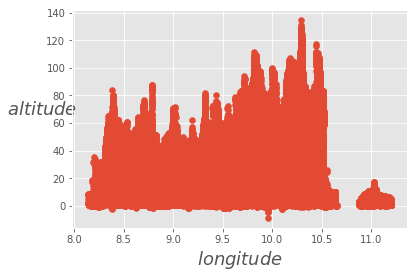

In [29]:
plt.scatter(data['long'],data['alti'])
plt.xlabel("$longitude$", fontsize=18)
plt.ylabel("$altitude$", rotation=0, fontsize=18)
plt.show()

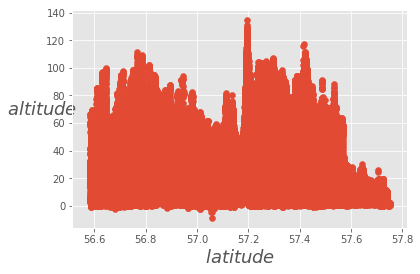

In [30]:
plt.scatter(data['lati'],data['alti'])
plt.xlabel("$latitude$", fontsize=18)
plt.ylabel("$altitude$", rotation=0, fontsize=18)
plt.show()

In [31]:
x = data.drop('alti',axis = 1)
x['bias'] = 1
x = x[['bias','lati','long']]
y = data['alti']

In [32]:
y.head()

0    17.614840
1    18.083536
2    18.279465
3    18.422974
4    19.124889
Name: alti, dtype: float64

In [33]:
X = np.array(x)
y = np.array(y)

y.shape

(434873,)

In [34]:
X[:,1:] = (X[:,1:]-np.mean(X[:,1:], axis = 0))/np.std(X[:,1:],axis = 0)
y = (y-np.mean(y))/np.std(y)

# print(X.mean(axis = 0))
print(X.shape)
print(y.shape)

(434873, 3)
(434873,)


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.05)
X_test = np.concatenate([X_test,X_val], axis = 0)
y_test = np.concatenate([y_test, y_val])

In [37]:
X_train.shape

(304411, 3)

In [38]:
X_transpose = X.T
Y = y
coeff = inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)
loss = 0.5*pow((Y-coeff[0]-coeff[1]*X[:,1]-coeff[2]*X[:,2]),2).sum()
print(coeff)
print(loss)

[  9.60416100e-15  -1.90628441e-01   1.50381653e-01]
211684.477106


In [39]:
def  lossfunc(x_,w_,y_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)

In [40]:
w = np.random.randn((3))
print(w.dot(X_train.T).shape)

(304411,)


In [41]:
#Function to calculate Rsquared and RMS
def RSq_RMS(w,x,y):
    RSS =  pow(w.dot(x.T) - y,2).sum()
    TSS =  pow(y - y.mean(),2).sum()
    n = len(y)
    rs = 1 - (RSS/TSS)
    RMS = pow(RSS/n,0.5)
    return [rs,RMS]

In [42]:
# Gradient Descent 

alpha =0.01
itns = 1000
counter = []
losses = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_train.T)
    
    if i%20 == 0:
        loss_ = lossfunc(X_train,w,y_train)
        losses.append(loss_)
        counter.append(i)
        print("iteration: {} loss : {}" .format(i,loss_))
    w_der = (y_hat-y_train)*(X_train.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 2.128536692297694
iteration: 20 loss : 1.364158527285339
iteration: 40 loss : 0.9566331446154667
iteration: 60 loss : 0.7391672468826503
iteration: 80 loss : 0.6229580855261218
iteration: 100 loss : 0.5607210274963335
iteration: 120 loss : 0.5272743234845892
iteration: 140 loss : 0.5092037441012182
iteration: 160 loss : 0.49936062025112044
iteration: 180 loss : 0.4939328230722294
iteration: 200 loss : 0.49088539705120365
iteration: 220 loss : 0.4891303128139926
iteration: 240 loss : 0.48808436881624456
iteration: 260 loss : 0.487433733695159
iteration: 280 loss : 0.4870085060323629
iteration: 300 loss : 0.4867158544140209
iteration: 320 loss : 0.4865043544267149
iteration: 340 loss : 0.48634494381733173
iteration: 360 loss : 0.4862207334710334
iteration: 380 loss : 0.4861215406420167
iteration: 400 loss : 0.486040942774022
iteration: 420 loss : 0.4859746788364481
iteration: 440 loss : 0.4859197728102548
iteration: 460 loss : 0.4858740456582755
iteration: 480

In [43]:
RSq_RMS(w,X_test,y_test)

[0.025589070976106965, 0.98937933690845481]

In [44]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test, w, y_test)
print(loss_gd_test)

0.489435736151


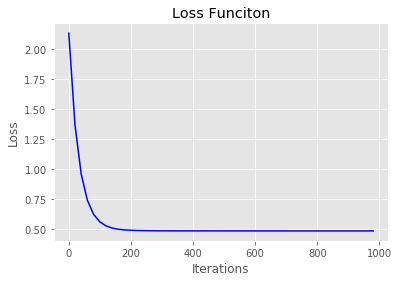

In [45]:
plt.plot(counter, losses, 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [46]:
# Stochastic Gradient Descent

alpha =0.0005
itns = 10000

losses_st = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    index = np.random.randint(X_train.shape[0])
#     print(index)
    x_st = X_train[index]
    y_st = y_train[index]
    y_hat = np.sum(w*x_st)
#     print(x_st, y_hat, y_st)
    loss_ = lossfunc(X_train,w,y_train)
    losses_st.append(loss_)
    if i%2000 == 0:
        print("iteration: {} loss : {}" .format(i,loss_))


    w_der = (y_hat-y_st)*(x_st)
#     print(w_der)
    w = w - alpha*w_der
    
print(w)


[0 1 1]
iteration: 0 loss : 2.128536692297694
iteration: 2000 loss : 0.5738273286378056
iteration: 4000 loss : 0.49772759627966834
iteration: 6000 loss : 0.4870345057116364
iteration: 8000 loss : 0.4859009326808263
[-0.01838332 -0.17610009  0.16391461]


In [47]:
RSq_RMS(w,X_test,y_test)

[0.02472983198282197, 0.98981545988001729]

In [48]:
# Stochastic Gradient Descent for testing

loss_sgd_test = lossfunc(X_test, w, y_test)
print(loss_sgd_test)


0.489867322309


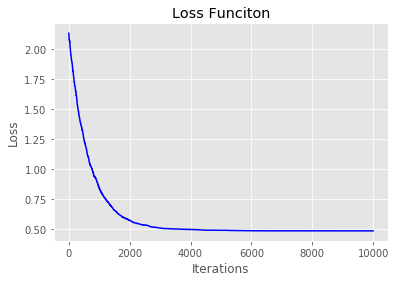

In [49]:
plt.plot(losses_st, 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [50]:
def  lossL1(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+(lambda_)*np.sum(np.abs(w_[1:]))

In [51]:
# Gradient Descent with L1 reg

alpha =0.001
itns = 1000
lambdas = [0.1,0.5,1,2]
losses_l1 = {}
losses_l1_val = {}
counter_l1 = []
w_storel1 = {}
for lambda_ in lambdas:
    losses_l1[lambda_] = []
    w = np.array([0,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train.T)  
        if i%20 == 0:  
            loss_ = lossL1(X_train,w,y_train,lambda_)
            losses_l1[lambda_].append(loss_)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))   
            counter_l1.append(i)
        w_der = (y_hat-y_train)*(X_train.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*np.sign(w)
        w = w - alpha*w_der_norm
    w_storel1[lambda_] = w
    losses_l1_val[lambda_] = lossL1(X_val, w, y_val,lambda_)

lambda: 0.1 iteration: 0 loss : 2.328536692297694
lambda: 0.1 iteration: 20 loss : 2.2166159512706565
lambda: 0.1 iteration: 40 loss : 2.111477592351385
lambda: 0.1 iteration: 60 loss : 2.0127102345442354
lambda: 0.1 iteration: 80 loss : 1.9199274044198078
lambda: 0.1 iteration: 100 loss : 1.8327660796767566
lambda: 0.1 iteration: 120 loss : 1.7508852660093224
lambda: 0.1 iteration: 140 loss : 1.673964660339815
lambda: 0.1 iteration: 160 loss : 1.601703395682862
lambda: 0.1 iteration: 180 loss : 1.5338188607158845
lambda: 0.1 iteration: 200 loss : 1.4700455915280102
lambda: 0.1 iteration: 220 loss : 1.4101342327103705
lambda: 0.1 iteration: 240 loss : 1.3538505590091363
lambda: 0.1 iteration: 260 loss : 1.3009745571632838
lambda: 0.1 iteration: 280 loss : 1.2512997520677438
lambda: 0.1 iteration: 300 loss : 1.204631643502183
lambda: 0.1 iteration: 320 loss : 1.160788072692206
lambda: 0.1 iteration: 340 loss : 1.119597757650206
lambda: 0.1 iteration: 360 loss : 1.080899808741047
lambda:

lambda: 2 iteration: 160 loss : 2.8679933186662696
lambda: 2 iteration: 180 loss : 2.563592950824626
lambda: 2 iteration: 200 loss : 2.277656636818449
lambda: 2 iteration: 220 loss : 2.0090640038348604
lambda: 2 iteration: 240 loss : 1.7567626685336348
lambda: 2 iteration: 260 loss : 1.5197641110096503
lambda: 2 iteration: 280 loss : 1.2971397991518043
lambda: 2 iteration: 300 loss : 1.0880175482025898
lambda: 2 iteration: 320 loss : 0.8915781012446854
lambda: 2 iteration: 340 loss : 0.7070519172071595
lambda: 2 iteration: 360 loss : 0.5674635224973807
lambda: 2 iteration: 380 loss : 0.5053321166047534
lambda: 2 iteration: 400 loss : 0.5015913633995674
lambda: 2 iteration: 420 loss : 0.5024820593942667
lambda: 2 iteration: 440 loss : 0.5007660971559937
lambda: 2 iteration: 460 loss : 0.5060264196414455
lambda: 2 iteration: 480 loss : 0.5025444148933695
lambda: 2 iteration: 500 loss : 0.5040844236281581
lambda: 2 iteration: 520 loss : 0.5000388209767443
lambda: 2 iteration: 540 loss : 0

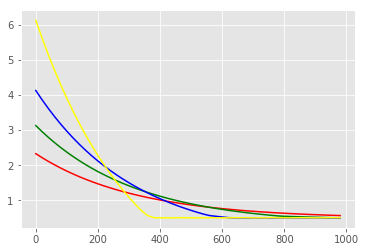

In [52]:
colors = np.array(['red','green','blue','yellow'])
for i,lamb in enumerate(losses_l1.keys()):
    plt.plot(counter, losses_l1[lamb],color = colors[i])

0.563055258593
0.501727665271
0.502508792267
0.502185063741


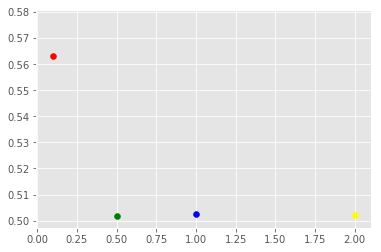

In [53]:
for i,lamb in enumerate(losses_l1_val.keys()):
    plt.scatter(lamb,losses_l1_val[lamb],color=colors[i])
    print(losses_l1_val[lamb])

In [54]:
RSq_RMS(w_storel1[0.5],X_test,y_test)

[4.0993710667902583e-05, 1.0022656836078199]

In [55]:
# Gradient Descent with L1 reg for testing
loss_l1gd_test = lossL1(X_test, w_storel1[0.5], y_test, 0.5)
print(w_storel1[0.5])
print(loss_l1gd_test)

[ 0.00024205 -0.00013003  0.00029439]
0.502480459473


In [56]:
def  lossL2(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+0.5*lambda_*np.sum(w_**2)

In [57]:
# Gradient Descent with L2 reg

alpha =0.001
itns = 1000
lambdas = [0.5,1,2,4,6]
losses_l2 = {}
losses_l2_val = {}
counter_l2 = []
w_store = {}

for lambda_ in lambdas:
    losses_l2[lambda_] = []
    w = np.array([0,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train.T)  
        if i%20 == 0:  
            loss_ = lossL2(X_train,w,y_train,lambda_)
            losses_l2[lambda_].append(loss_)
            counter_l2.append(i)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))
            
        w_der = (y_hat-y_train)*(X_train.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*w
        w = w - alpha*w_der_norm
    w_store[lambda_] = w
    losses_l2_val[lambda_] = lossL2(X_val, w, y_val,lambda_)

lambda: 0.5 iteration: 0 loss : 2.628536692297694
lambda: 0.5 iteration: 20 loss : 2.4593750777499017
lambda: 0.5 iteration: 40 loss : 2.3036218148713825
lambda: 0.5 iteration: 60 loss : 2.1602137019375482
lambda: 0.5 iteration: 80 loss : 2.028171857711377
lambda: 0.5 iteration: 100 loss : 1.9065950335977164
lambda: 0.5 iteration: 120 loss : 1.794653456261551
lambda: 0.5 iteration: 140 loss : 1.6915831586343812
lambda: 0.5 iteration: 160 loss : 1.5966807605702629
lambda: 0.5 iteration: 180 loss : 1.5092986634857912
lambda: 0.5 iteration: 200 loss : 1.428840626147322
lambda: 0.5 iteration: 220 loss : 1.35475769137327
lambda: 0.5 iteration: 240 loss : 1.2865444358173757
lambda: 0.5 iteration: 260 loss : 1.2237355172065987
lambda: 0.5 iteration: 280 loss : 1.1659024954399466
lambda: 0.5 iteration: 300 loss : 1.1126509058260263
lambda: 0.5 iteration: 320 loss : 1.0636175644600534
lambda: 0.5 iteration: 340 loss : 1.0184680873274268
lambda: 0.5 iteration: 360 loss : 0.9768946061814421
lambd

lambda: 4 iteration: 200 loss : 1.1020777623732614
lambda: 4 iteration: 220 loss : 0.9811707662682657
lambda: 4 iteration: 240 loss : 0.8844470941128363
lambda: 4 iteration: 260 loss : 0.8070696398530448
lambda: 4 iteration: 280 loss : 0.7451688160748009
lambda: 4 iteration: 300 loss : 0.6956490292947705
lambda: 4 iteration: 320 loss : 0.6560338646330319
lambda: 4 iteration: 340 loss : 0.624342237063414
lambda: 4 iteration: 360 loss : 0.5989893151902893
lambda: 4 iteration: 380 loss : 0.5787072624634007
lambda: 4 iteration: 400 loss : 0.5624818318811466
lambda: 4 iteration: 420 loss : 0.5495016431188539
lambda: 4 iteration: 440 loss : 0.5391176053075931
lambda: 4 iteration: 460 loss : 0.5308104561045369
lambda: 4 iteration: 480 loss : 0.5241647936156553
lambda: 4 iteration: 500 loss : 0.5188483024574355
lambda: 4 iteration: 520 loss : 0.5145951350170962
lambda: 4 iteration: 540 loss : 0.5111926167827309
lambda: 4 iteration: 560 loss : 0.5084706108593858
lambda: 4 iteration: 580 loss : 

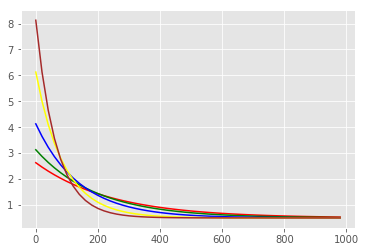

In [58]:
colors = np.array(['red','green','blue','yellow','brown','pink'])
for i,lamb in enumerate(losses_l2.keys()):
    plt.plot(counter, losses_l2[lamb],color = colors[i])

0.529976912154
0.51300192285
0.502060214272
0.500384922857
0.500697459964


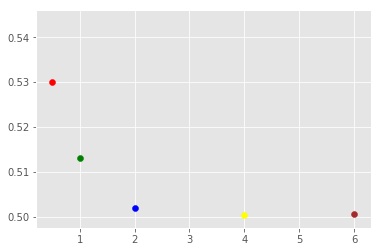

In [59]:
for i,lamb in enumerate(losses_l2_val.keys()):
    plt.scatter(lamb,losses_l2_val[lamb],color=colors[i])
    print(losses_l2_val[lamb])

In [60]:
print(RSq_RMS(w_store[4],X_test,y_test))

[0.0047865343793208615, 0.99988461148952112]


In [61]:
# Gradient Descent with L2 reg for testing
loss_l2gd_test = lossL2(X_test, w_store[4], y_test, 4)
print(w_store[4])
print(loss_l2gd_test)


[-0.00030898 -0.01861976  0.0144165 ]
0.500993871114
